In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import scipy.stats as stats

# Descriptive Statistics

## Frequency Distribution Tables

To create frequency distibution table, you need to follow the following steps  
1. Calculate the range by `range = max - min`.
2. Find the class interval by `interval = range/ desired classes number`. Round the number if needed.
3. Select initial value.
5. Create Classes using `Class = initial Value ~ (initial Value + interval - 1)`
6. Iterate by adding the interval to the initial value.
7. Create the table by using the first column for the classes and the other column for the frequency.

To convert to RELATIVE FREQUENCY DISTRIBUTIONS, use `relative distibution = frequency / total frequency`
To create CUMULATIVE FREQUENCY, use the frequency of each class with addition to it all frequencies of classes bellow it. 
You can also have the percentage of the CUMULATIVE FREQUENCY (Percentile Ranks) which will always end in 100%

In [2]:
# Here is example for frequency table of interval of 2 starting from 0-1 to 8-9
vals = np.array([1, 1, 2, 3, 8, 9, 7, 6, 4, 8, 3, 4, 7, 8, 3, 7, 6, 7, 7, 6, 2, 5, 4, 6, 9, 0])
range1 = np.max(vals) - np.min(vals)
# Assuming I want 5 classes.
ClassesNum = 5
interval = range1 / ClassesNum
interval = round(interval) # the interval is 1.6 which can be rounded up to 2.
print("Range: ", range1, " Maximum Value: ", np.max(vals), " Interval: ", interval)

Range:  9  Maximum Value:  9  Interval:  2


In [3]:
# Create classes
ClassesVals = pd.Series(dtype=str)
n = 0
for i in range(int(ClassesNum)):
    n1 = n
    n2 = n1 + interval - 1
    x = str(n1) + "-" + str(n2)
    ClassesVals.loc[i] = x
    n = n + interval

# Calculate frequencies
freq = []
for class_range in ClassesVals:
    start, end = map(int, class_range.split('-'))
    count = np.sum(np.logical_and(vals >= start, vals <= end))
    freq.append(count)

# Create a Pandas Series with frequencies
freq_series = pd.Series(freq, index=ClassesVals.values)

print("Frequencies as Series:")
print(freq_series)

Frequencies as Series:
0-1    3
2-3    5
4-5    4
6-7    9
8-9    5
dtype: int32


In [4]:
freq_df = freq_series.reset_index() # convert to dataframe 

# create frequency distibution
freq_df.columns = ['classes', 'frequency']
freq_df['percentage'] = (freq_df['frequency'] / len(vals)) * 100

# create cumulative frequency distibution 
freq_df['cumulative_frequency'] = freq_df['frequency'].cumsum()
freq_df['cumulative_percentage'] = (freq_df['cumulative_frequency'] / len(vals)) * 100
print(freq_df)

  classes  frequency  percentage  cumulative_frequency  cumulative_percentage
0     0-1          3   11.538462                     3              11.538462
1     2-3          5   19.230769                     8              30.769231
2     4-5          4   15.384615                    12              46.153846
3     6-7          9   34.615385                    21              80.769231
4     8-9          5   19.230769                    26             100.000000


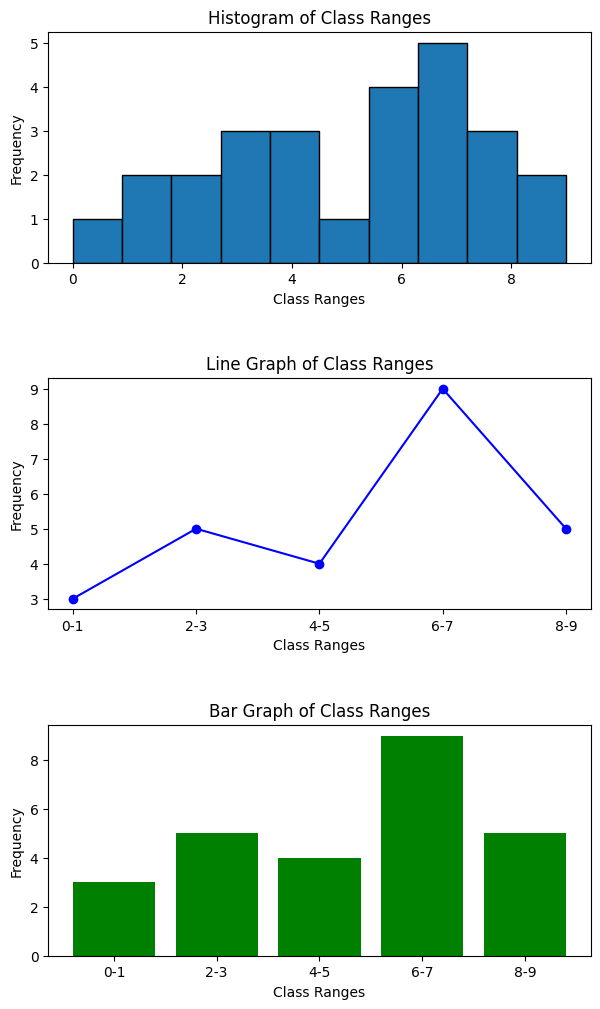

In [5]:
# Visualize Frequency Distibution using Histogram, Line graph, and Bar graph. 
class_ranges = freq_df['classes']
frequencies = freq_df['frequency']

# create three sub-plots objects
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(7, 12))
fig, (ax1, ax2, ax3) = plot_objects

# Create the histogram
ax1.hist(vals, bins = 10, edgecolor='black', align='mid')

# Set the labels and title for ax1
ax1.set_xlabel('Class Ranges')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Class Ranges')

# Create line graph
ax2.plot(class_ranges, frequencies, color='blue', linestyle='-', marker='o')

# Set labels and title for ax2
ax2.set_xlabel('Class Ranges')
ax2.set_ylabel('Frequency')
ax2.set_title('Line Graph of Class Ranges')

# Create a bar graph
ax3.bar(class_ranges, frequencies, color='green')

# Set labels and title for ax3
ax3.set_xlabel('Class Ranges')
ax3.set_ylabel('Frequency')
ax3.set_title('Bar Graph of Class Ranges')

# Show the plot
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

## Averages

**We have typically three averages which are Mode, Median, Mean.**
1. Mode is the most frequent value in the dataset.
2. Median is the value located in the middle of the dataset.
3. Mean is given by `mean = sum(values)/N`. where N is the number of values in the dataset

In [6]:
# generate an array that we can use as our data
#Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4]) # Normal Distibution
#Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4, 5, 5, 5, 5]) # Negetively skewed distibution
Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4, 1, 1, 1, 1]) # Positively skewed distibution
#Random_vals = np.random.randint(1, 10, size=100) # random values

# Calculate value counts to get frequencies
unique_vals, frequencies = np.unique(Random_vals, return_counts=True) # Calculate the frequency distibution

FD = pd.DataFrame({'Value': unique_vals,'Frequency': frequencies})
print("Frequency Distibution")
FD

Frequency Distibution


,Value,Frequency
0,1,5
1,2,2
2,3,3
3,4,2
4,5,1


In [7]:
# we can define functions to calculate averages as: 
def calculate_mode(array):
    values, counts = np.unique(array, return_counts=True)
    max_count = np.max(counts)
    mode_values = values[counts == max_count]
    mode_counts = counts[counts == max_count]
    return mode_values, mode_counts

def calculate_median(array):
    sortVals = np.sort(array)
    n = len(array)
    if (n%2 == 0):
        x1 = sortVals[n//2]
        x2 = sortVals[n//2 - 1]
        x = (x1+x2)/2
    else:
        x = sortVals[n//2]
    return x
    
def calculate_mean(array):
    x = np.sum(array)/len(array)
    return x

modeV, count = calculate_mode(Random_vals)
print("Mode: ", modeV, "Count: ", count)
print()
print("Our Function give Median: ", calculate_median(Random_vals), " Mean: ", calculate_mean(Random_vals))

# you can also use the numpy functions for mean and median
meanV = np.mean(Random_vals)
medianV = np.median(Random_vals)
print("Numpy Functions give Median: ", medianV, " Mean: ", meanV)

Mode:  [1] Count:  [5]

Our Function give Median:  2  Mean:  2.3846153846153846
Numpy Functions give Median:  2.0  Mean:  2.3846153846153846


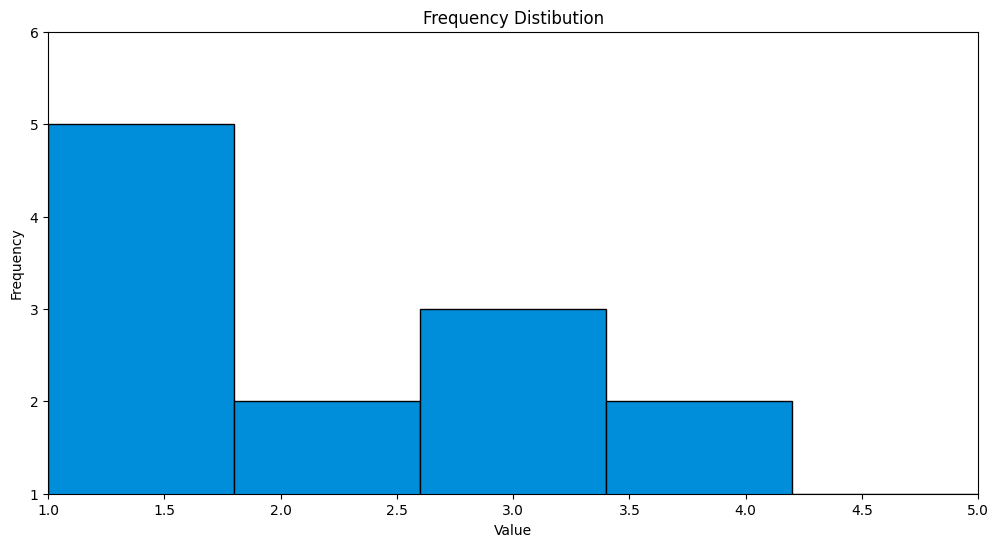

In [8]:
# Plot Histogram for the frequency distribution

plt.figure(figsize=(12, 6))

plt.hist(Random_vals, bins=len(unique_vals), color='#008DDA', edgecolor='black') # histogram

plt.title('Frequency Distibution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(left=1, right = max(unique_vals))
plt.ylim(bottom=1, top = max(frequencies)+1)
plt.show()

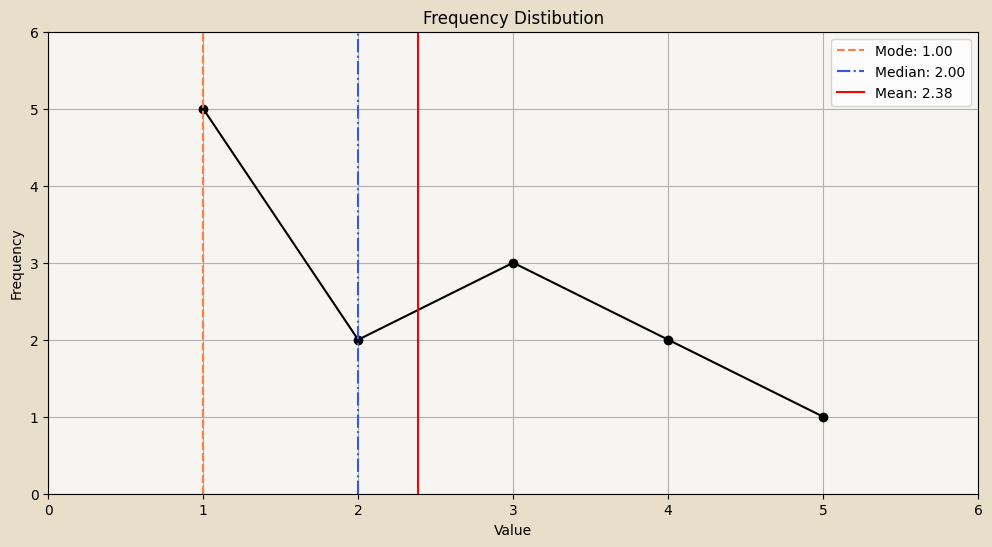

In [9]:
# Plot the values
plt.figure(figsize=(12, 6), facecolor='#E8DFCA')
ax = plt.gca() # Set background color for the graph area
ax.set_facecolor('#F6F5F2')

plt.plot(unique_vals, frequencies, marker='o', linestyle='-', color='black') # line graph

mode_label = ', '.join([f'{mode:.2f}' for mode in modeV])
for i in range(len(modeV)):
    mode = modeV[i]
    plt.axvline(x=mode, color='#FF7F3E', linestyle='--') # plot the modes
    if (i == len(modeV) - 1):
        plt.axvline(x=mode, color='#FF7F3E', linestyle='--', label = "Mode: " + mode_label) # plot the modes

plt.axvline(x=medianV, color='#3559E0', linestyle='-.', label=f'Median: {medianV:.2f}') # plot the median
plt.axvline(x=meanV, color='r', linestyle='-', label=f'Mean: {meanV:.2f}') # plot the mean

plt.title('Frequency Distibution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(left=0, right = max(unique_vals)+1)
plt.ylim(bottom=0, top = max(frequencies)+1)
plt.show()

## Variability

Measurement of variability gives us a distance measurement by which the data is spread out.
We have the following values to estimate the variablility:
1. Range which is; `range = max - min`.
2. Variance which is given by: `sigma^2 = SS / n`. Use `n-1` if you have a sample
3. Standard of deviation is given by: `signam = sqrt(sigma^2) = sqrt(variance)`
4. INTERQUARTILE RANGE (IQR) which is given by `IQR = Q3-Q1`

The above formulas use two concepts which are:
1. Sum of Squars (SS) which is given by: `(SS = sum((values-X)^2)`
2. Degree of freedome which is a measure for how much the data is allowed to be spread out. It has multiple formulas but in our case here, it is `df = n - 1`

In [10]:
# generate the population
Random_vals = np.random.randint(0, 20, size=100)
"""
# generate normal distibuted array
Random_vals = np.random.normal(10, 2, 1000) # normal array with parameters (mean, standard of deviation, size)
Random_vals = np.round(Random_vals) # Round the values to the nearest integers
Random_vals = np.clip(Random_vals, 1, 19) # Clip the values to be within the range 1 to 19

# Generate left-skewed or right-skewed values using Beta distribution
# if a_left < a_right, it is left-skewed. If the opposite, it is right-skewed. 
Random_vals = np.random.beta(5, 2, 1000) * 20 #parameters (a_left, b_left, size)
# Round and clip to integer values between 1 and 19
Random_vals = np.round(Random_vals)
Random_vals = np.clip(Random_vals, 1, 19)
"""

'\n# generate normal distibuted array\nRandom_vals = np.random.normal(10, 2, 1000) # normal array with parameters (mean, standard of deviation, size)\nRandom_vals = np.round(Random_vals) # Round the values to the nearest integers\nRandom_vals = np.clip(Random_vals, 1, 19) # Clip the values to be within the range 1 to 19\n\n# Generate left-skewed or right-skewed values using Beta distribution\n# if a_left < a_right, it is left-skewed. If the opposite, it is right-skewed. \nRandom_vals = np.random.beta(5, 2, 1000) * 20 #parameters (a_left, b_left, size)\n# Round and clip to integer values between 1 and 19\nRandom_vals = np.round(Random_vals)\nRandom_vals = np.clip(Random_vals, 1, 19)\n'

In [11]:
# pick a sample if needed
# Random_vals = np.random.choice(Random_vals, size=100, replace=False)

# Calculate value counts to get frequencie and the mean
unique_vals, frequencies = np.unique(Random_vals, return_counts=True) # Calculate the frequency distibution
meanV = np.mean(Random_vals)
FD = pd.DataFrame({'Value': unique_vals,'Frequency': frequencies})
print("Frequency Distibution")
FD

Frequency Distibution


,Value,Frequency
0,0,6
1,1,2
2,2,8
3,3,3
4,4,3
5,5,3
6,6,4
7,7,5
8,8,5
9,9,5


In [12]:
# Calculate the range
rangeArr = np.max(Random_vals) - np.min(Random_vals)

# calculate the variance and standard of deviation
variance = np.var(Random_vals, ddof=0)
std_dev = np.sqrt(variance)
print("Range:", rangeArr, "\nVariance:", variance, "\nStandard of Deviation:", std_dev)

# you can also calculate the variance using this algorithm. 
X = np.mean(Random_vals)
v = 0
for i in range(len(Random_vals)):
    x = (Random_vals[i] - X)**2
    v = v + x
v = v / (len(Random_vals) - 0) # adjust this algorithm to (n - 1) if you are using a sample
std_dev_v = np.sqrt(v)
print("\nVariance:", v, "and Standard of Deviation:", std_dev_v)

# calculate the INTERQUARTILE RANGE (IQR)
Q1 = np.percentile(Random_vals, 25)
Q3 = np.percentile(Random_vals, 75)
IQR = Q3 - Q1
print("\nIQR:", IQR)

Range: 19 
Variance: 33.4819 
Standard of Deviation: 5.786354638284799

Variance: 33.48190000000001 and Standard of Deviation: 5.7863546382847995

IQR: 9.25


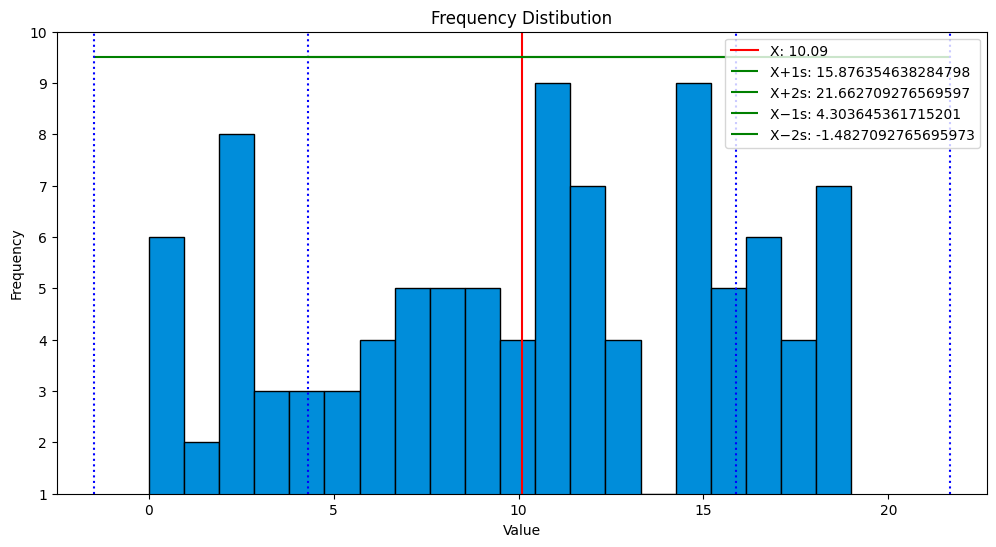

In [13]:
# plot the results

plt.figure(figsize=(12, 6))

plt.hist(Random_vals, bins=len(unique_vals), color='#008DDA', edgecolor='black') # histogram
plt.axvline(x=meanV, color='r', linestyle='-', label=f'X: {meanV:.2f}') # plot the mean

# Plot Standard of Deviation as horisantal line
plt.hlines(y= np.max(frequencies)+0.5, xmin = meanV, xmax=meanV+std_dev, colors='g', 
           linestyles='-', label=f'X+1s: {meanV+std_dev}')
plt.axvline(x=meanV+std_dev, color='b', linestyle=':')

plt.hlines(y= np.max(frequencies)+0.5, xmin = meanV, xmax=meanV+2*std_dev, colors='g', 
           linestyles='-', label=f'X+2s: {meanV+2*std_dev}')
plt.axvline(x=meanV+2*std_dev, color='b', linestyle=':')

plt.hlines(y= np.max(frequencies)+0.5, xmin = meanV-std_dev, xmax=meanV, colors='g', 
           linestyles='-', label=f'X−1s: {meanV-std_dev}')
plt.axvline(x=meanV-std_dev, color='b', linestyle=':')
plt.hlines(y= np.max(frequencies)+0.5, xmin = meanV-2*std_dev, xmax=meanV, colors='g', 
           linestyles='-', label=f'X−2s: {meanV-2*std_dev}')
plt.axvline(x=meanV-2*std_dev, color='b', linestyle=':')

plt.title('Frequency Distibution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xlim(left=meanV- 2*std_dev-1, right = meanV+2*std_dev+1)
#plt.xlim(left=0, right = max(unique_vals)+1)
plt.ylim(bottom=1, top = max(frequencies)+1)
plt.show()

## Normal Distribution 

In [14]:
# generate normal distibuted array
Random_vals = np.random.normal(10, 2, 1000) # normal array with parameters (mean, standard of deviation, size)
Random_vals = np.round(Random_vals) # Round the values to the nearest integers
Random_vals = np.clip(Random_vals, 0, 20) # Clip the values to be within the range 1 to 19

# Calculate distibution properties 
unique_vals, frequencies = np.unique(Random_vals, return_counts=True) # get the frequency distibution x and y axes values
meanV = np.mean(Random_vals) # calculate the mean
std_dev = np.sqrt(np.var(Random_vals, ddof=0)) # calculate the standard of deviation
FD = pd.DataFrame({'Value': unique_vals,'Frequency': frequencies})
FD['Percentage'] = (FD['Frequency'] / len(Random_vals)) * 100

print("Frequency Distibution Dataframe")
FD

Frequency Distibution Dataframe


,Value,Frequency,Percentage
0,4.0,3,0.3
1,5.0,8,0.8
2,6.0,18,1.8
3,7.0,62,6.2
4,8.0,120,12.0
5,9.0,172,17.2
6,10.0,196,19.6
7,11.0,173,17.3
8,12.0,138,13.8
9,13.0,77,7.7


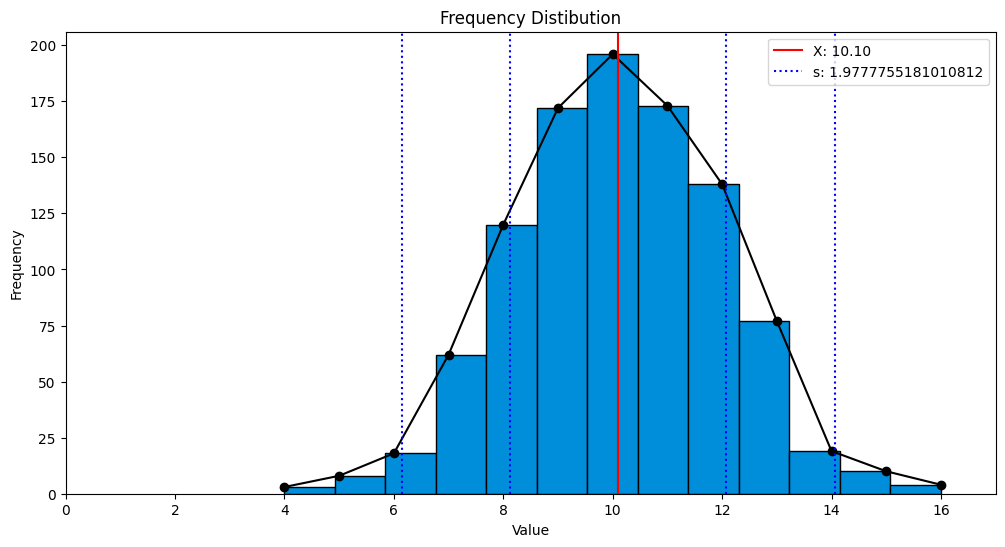

In [15]:
plt.figure(figsize=(12, 6))

plt.hist(Random_vals, bins=len(unique_vals), color='#008DDA', edgecolor='black') # histogram
plt.plot(unique_vals, frequencies, marker='o', linestyle='-', color='black') # line graph

# plot mean and standard of deviation
plt.axvline(x=meanV, color='r', linestyle='-', label=f'X: {meanV:.2f}') # plot the mean
plt.axvline(x=meanV+std_dev, color='b', linestyle=':', label=f's: {std_dev}')
plt.axvline(x=meanV+2*std_dev, color='b', linestyle=':')
plt.axvline(x=meanV-std_dev, color='b', linestyle=':')
plt.axvline(x=meanV-2*std_dev, color='b', linestyle=':')

plt.title('Frequency Distibution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xlim(left=0, right = max(unique_vals)+1)
plt.ylim(bottom=0, top = max(frequencies)+10)
plt.show()

We have mean of -2.184918912462308e-16 and standard of deviation of 1.0


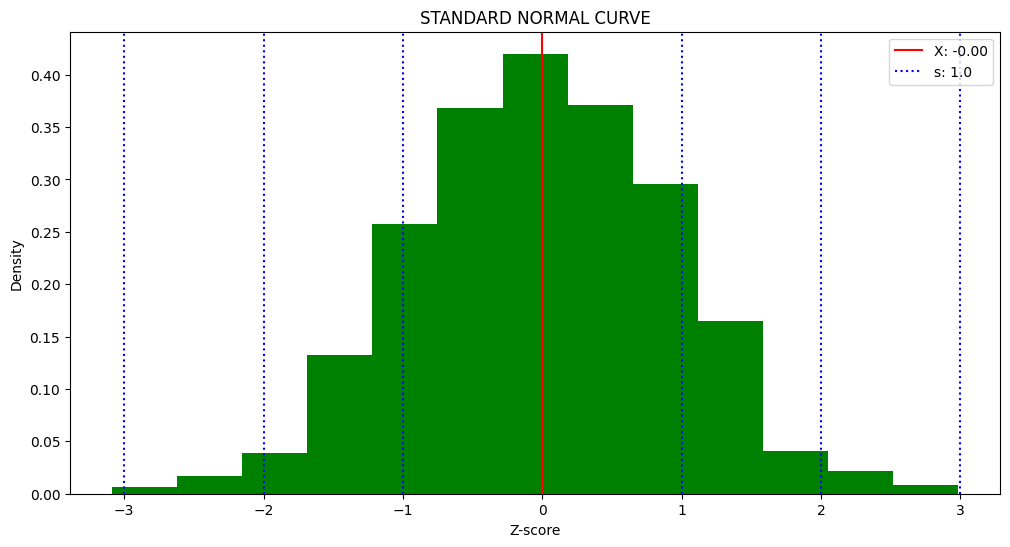

In [16]:
# Calculate Z-scores
z_scores = (Random_vals - meanV) / std_dev

meanVZ = np.mean(z_scores) # calculate the mean
std_devZ = np.sqrt(np.var(z_scores, ddof=0)) # calculate the standard of deviation

print(f"We have mean of {meanVZ} and standard of deviation of {std_devZ}")

# Plot the Z-scores histogram
plt.figure(figsize=(12, 6))
plt.hist(z_scores, bins=len(unique_vals), density=True, color='g')

# plot mean and standard of deviation
plt.axvline(x=meanVZ, color='r', linestyle='-', label=f'X: {meanVZ:.2f}') # plot the mean
plt.axvline(x=meanVZ+std_devZ, color='b', linestyle=':', label=f's: {std_devZ}')
plt.axvline(x=meanVZ+2*std_devZ, color='b', linestyle=':')
plt.axvline(x=meanVZ-std_devZ, color='b', linestyle=':')
plt.axvline(x=meanVZ-2*std_devZ, color='b', linestyle=':')
plt.axvline(x=meanVZ+3*std_devZ, color='b', linestyle=':')
plt.axvline(x=meanVZ-3*std_devZ, color='b', linestyle=':')

plt.title('STANDARD NORMAL CURVE')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.show()

Total percentage to the left of the mean: 57.90%
Total percentage to the right of the mean: 42.10%

Cumulative Probability: 0.03.
Z-score for 7.00 is -1.57.
Cumulative probability for using standard Z-score method: 0.06.


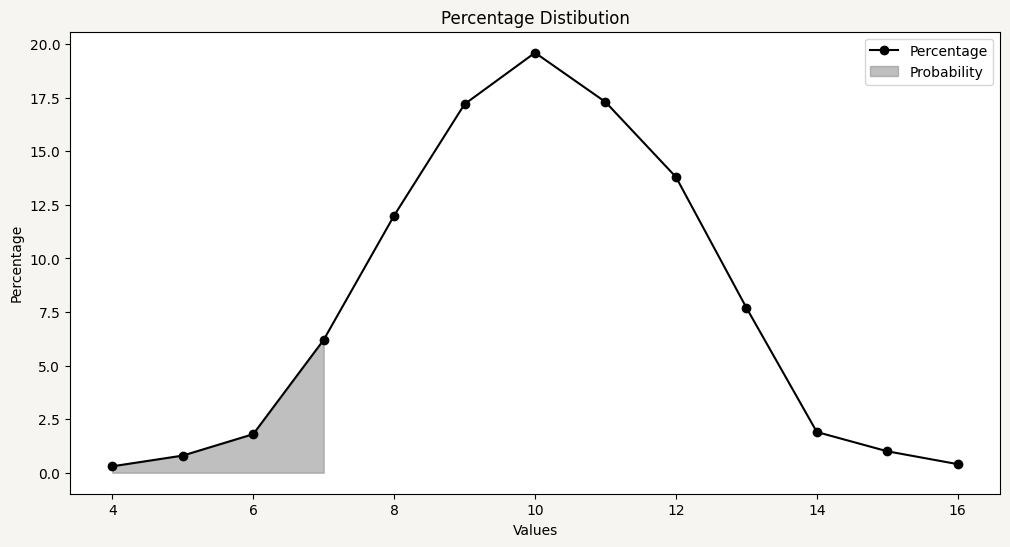

In [17]:
"""
Mathematically speaking, cumulative percentage for a certain value should equal the probability in ideal noraml distibution.
An ideal noraml distibution should have 50% probability for the left and right sides of the mean. 

We can approximate the probability using the standard z-score table available in the internet 
or by the use of the error function.

Bellow is an example of how this work. 
"""
value = 7 # we will check the probability for values under 7; P(x<7)

# Test how ideal is the noraml curve by calculating total percentage for the left and right of the mean
left_of_mean = FD[FD['Value'] <= meanV]['Percentage'].sum()
right_of_mean = FD[FD['Value'] > meanV]['Percentage'].sum()
print(f"Total percentage to the left of the mean: {left_of_mean:.2f}%")
print(f"Total percentage to the right of the mean: {right_of_mean:.2f}%")
print()

# Calculate the probability using cumulative percentage
cumulative_percentage = FD[FD['Value'] < value]['Percentage'].sum()
cumulative_probability = cumulative_percentage/100
print(f"Cumulative Probability: {cumulative_probability:.2f}.")

# get the probability using z-score
val_z_scr = (value - meanV) / std_dev
print(f"Z-score for {value:.2f} is {val_z_scr:.2f}.")
cumulative_prob = 0.5 * (1 + math.erf( val_z_scr / math.sqrt(2)))
print(f"Cumulative probability for using standard Z-score method: {cumulative_prob:.2f}.")

# Plot the Z-scores histogram
plt.figure(figsize=(12, 6), facecolor='#F6F5F2')
plt.plot(FD['Value'], FD['Percentage'], marker='o', linestyle='-', color='black', label="Percentage") # line graph

plt.fill_between(FD['Value'], 0, FD['Percentage'], where=(FD['Value'] <= value), 
                 color='gray', alpha=0.5, label="Probability")

plt.title('Percentage Distibution')
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [18]:
# we can perform the opposite if we are given the percentage to find the value 
value = meanV + val_z_scr * std_dev
value

7.0

## Correlation

In [19]:
np.random.seed(10) # Set the random seed for reproducibility
num_data_points = 1000 # Number of data points

# Generate base random data between 0 and 20
base = np.random.randint(0, 21, num_data_points)

# Generate correlated data with added noise
noise = np.random.normal(0, 2, num_data_points)  # Adjust the standard deviation of the noise as needed
messages_received = base
#messages_sent =  np.random.randint(0, 21, num_data_points) # No relationship
messages_sent = base + noise # positive linear relationship 
#messages_sent = 20 - base + noise # negative linear relationship 
#messages_sent = 10 + 10 * np.sin(messages_received / 6) + noise  # Curvilinear Relationship

# Ensure values are within the range 0 to 20 and round them to integers
messages_received = np.clip(messages_received, 0, 20).astype(int)
messages_sent = np.clip(messages_sent, 0, 20).astype(int)

# Create a DataFrame
table = pd.DataFrame({
    'Received': messages_received,
    'Sent': messages_sent
})

table.head()

,Received,Sent
0,9,9
1,4,2
2,15,16
3,0,1
4,17,18


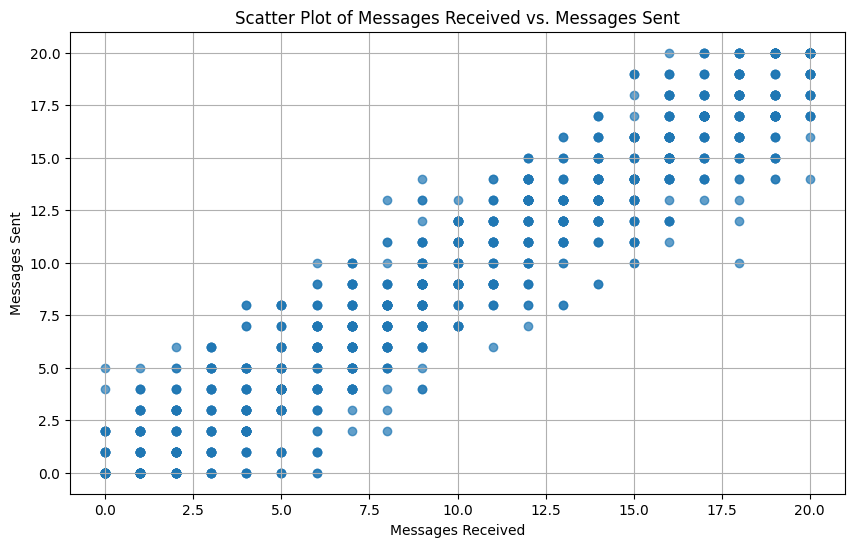

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['Received'], table['Sent'], alpha=0.7)
plt.title('Scatter Plot of Messages Received vs. Messages Sent')
plt.xlabel('Messages Received')
plt.ylabel('Messages Sent')
plt.grid(True)
plt.show()

In [21]:
# Calculate the Pearson correlation coefficient. This coefficent is a measure for the strength of the correlation

# we can use the direct method from the library
correlation = table.corr(method='pearson').loc['Received', 'Sent']
print(f'Pearson correlation coefficient: {correlation:.3f}')

Pearson correlation coefficient: 0.951


In [22]:
# We can calculate the coefficient using np.sum() method
x = table['Received']
y = table['Sent']

# Means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate SPxy
SPxy = np.sum((x - mean_x) * (y - mean_y))

# Calculate SSx and SSy
SSx = np.sum((x - mean_x) ** 2)
SSy = np.sum((y - mean_y) ** 2)

# Calculate Pearson correlation coefficient
r = SPxy / math.sqrt(SSx * SSy)

print(f'Pearson correlation coefficient: {r:.3f}\n')

# we can also calculate the coefficient using for loops

# Calculate SSx; sum of squares for x values
meanX = np.mean(table['Received'])
SSx = 0
for i in table['Received']:
    v = i - meanX
    SSx += v**2
print(f'SSx: {SSx}')

# Calculate SSy; sum of squares for y values
meanY = np.mean(table['Sent'])
SSy = 0
for i in table['Sent']:
    v = i - meanY
    SSy += v**2
print(f'SSy: {SSy}')

# Calculate SPxy; sum of procuct for x and y values
SPxy = 0
for i in range(len(table['Received'])):
    v = (table['Received'].iloc[i] - meanX) * (table['Sent'].iloc[i] - meanY)
    SPxy += v
print(f'SPxy: {SPxy}')

r = SPxy / math.sqrt(SSx * SSy)
print(f'Pearson correlation coefficient: {r:.3f}')

Pearson correlation coefficient: 0.951

SSx: 36974.99899999996
SSy: 38047.27100000013
SPxy: 35664.52700000003
Pearson correlation coefficient: 0.951


## Regression

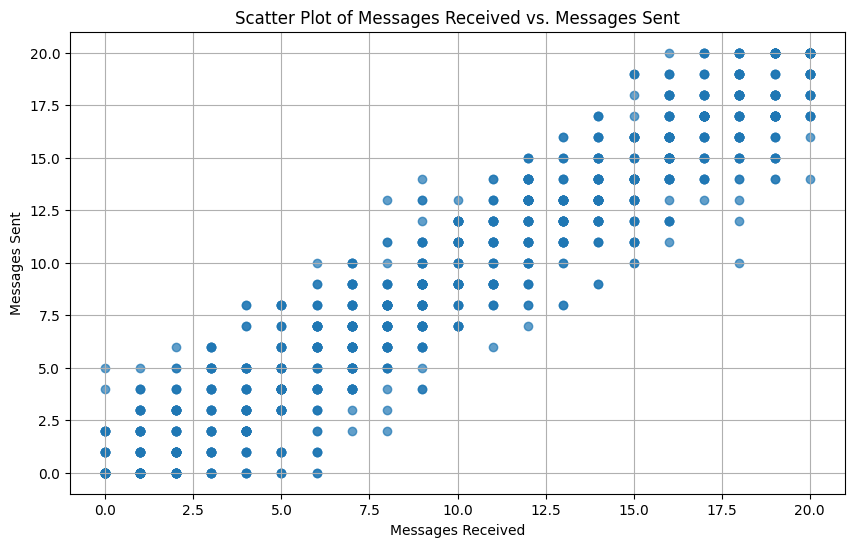

In [23]:
# Generate dataframe from random values
np.random.seed(10) # Set the random seed for reproducibility
num_data_points = 1000 # Number of data points

# Generate base random data between 0 and 20
base = np.random.randint(0, 21, num_data_points)

# Generate correlated data with added noise
noise = np.random.normal(0, 2, num_data_points)  # Adjust the standard deviation of the noise as needed
messages_received = base
#messages_sent =  np.random.randint(0, 21, num_data_points) # No relationship
messages_sent = base + noise # positive linear relationship 
#messages_sent = 20 - base + noise # negative linear relationship 
#messages_sent = 10 + 10 * np.sin(messages_received / 6) + noise  # Curvilinear Relationship

# Ensure values are within the range 0 to 20 and round them to integers
messages_received = np.clip(messages_received, 0, 20).astype(int)
messages_sent = np.clip(messages_sent, 0, 20).astype(int)

# Create a DataFrame
table = pd.DataFrame({
    'Received': messages_received,
    'Sent': messages_sent
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['Received'], table['Sent'], alpha=0.7)
plt.title('Scatter Plot of Messages Received vs. Messages Sent')
plt.xlabel('Messages Received')
plt.ylabel('Messages Sent')
plt.grid(True)
plt.show()

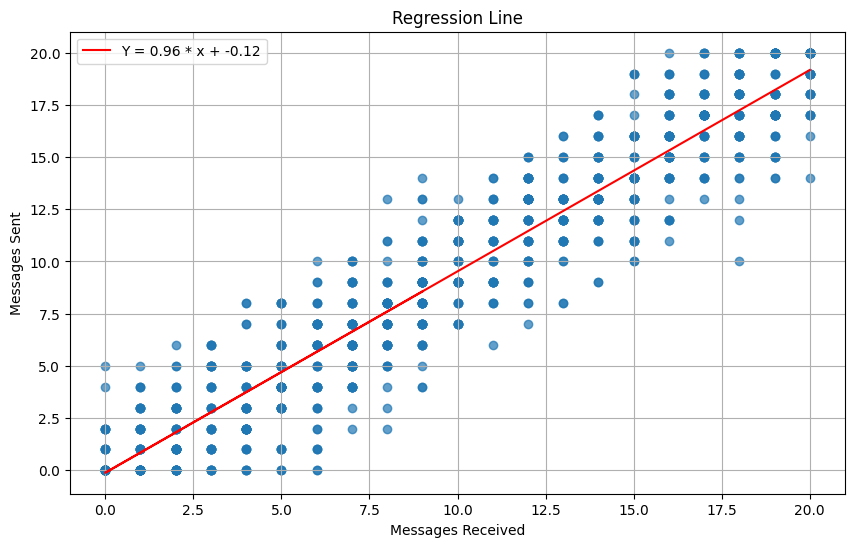

In [24]:
# Create a regression line
x = table['Received']
y = table['Sent']

# Calculate the regression coefficients
b, a = np.polyfit(x, y, 1)
Y = b * x + a

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, Y, label=f'Y = {b:.2f} * x + {a:.2f}', color='r')
plt.title('Regression Line')
plt.xlabel('Messages Received')
plt.ylabel('Messages Sent')
plt.legend()
plt.grid(True)
plt.show()

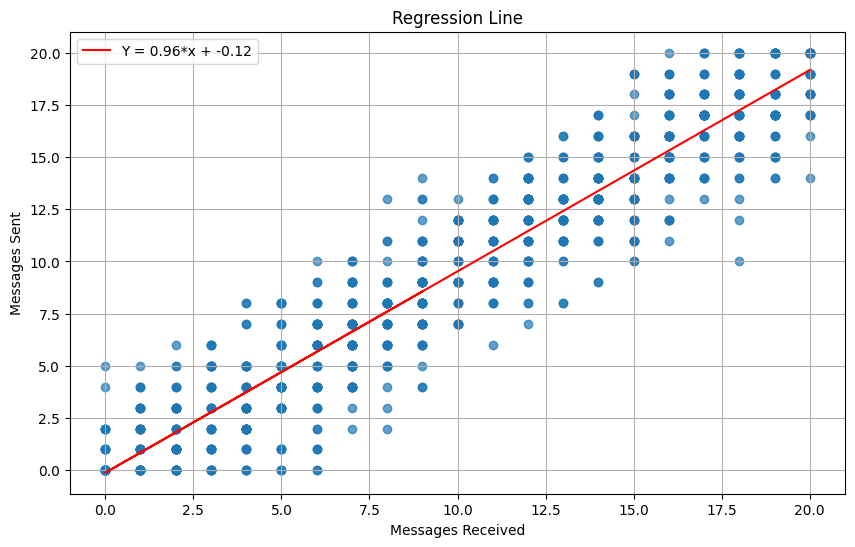

In [25]:
# Create a regression line (using calculations) 
x = table['Received']
y = table['Sent']
mean_x = np.mean(x)
mean_y = np.mean(y)

r = table.corr(method='pearson').loc['Received', 'Sent']
SSx = np.sum((x - mean_x) ** 2)
SSy = np.sum((y - mean_y) ** 2)
b = r*np.sqrt(SSy/SSx)
a = mean_y - b*mean_x

Y = b*x + a

plt.figure(figsize=(10, 6))
plt.scatter(table['Received'], table['Sent'], alpha=0.7)
plt.plot(x, Y, label=f'Y = {b:.2f}*x + {a:.2f}', color='r')
plt.title('Regression Line')
plt.xlabel('Messages Received')
plt.ylabel('Messages Sent')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Calculate the standar error of estimate
"""
The standard error of estimate (SEE), also known as the residual standard error, 
measures the accuracy of predictions made by the regression model. 
It quantifies the typical distance between the observed values and the values predicted by the model. 
The lower the SEE, the better the model fits the data.

This value doesn't have range. The higher this value, the less accurate the model. 
"""

# Use the computational formual using r
sdr_err_est = np.sqrt((SSy*(1-r**2))/(len(x)-2)) # standard error of estimate formula (quick) 
print(f'Standard Error of Estimate: {sdr_err_est:.2f}')

# Use the standard formula without using r
residuals = y - Y # Calculate the residuals
SS_residuals = np.sum(residuals ** 2) # obtain sum of the squares for predictive errors (SSy|x) or sum of squared residuals
degrees_of_freedom = len(x) - 2 # Calculate the degrees of freedom
standard_error = np.sqrt(SS_residuals / degrees_of_freedom) # Calculate the standard error of estimate
print(f'Standard Error of Estimate: {standard_error:.2f}')

# Calculate coefficient of determination r^2
"""
It is a number between 0 and 1 that measures variablility.
This number how the data varies around the regression line but it doesn't imply necceralily good regression model 
"""

print("Coefficient of determination:", r**2)

r2 = (SSy - SS_residuals)/SSy # calculate this cofficient using the standard formula
print("Coefficient of determination:", r2)

Standard Error of Estimate: 1.91
Standard Error of Estimate: 1.91
Coefficient of determination: 0.9041515985054698
Coefficient of determination: 0.9041515985054667


## Probability

The probability of occurrence of an event depends on the frequency distribution and can be obtained as:
1. Probability of event A is `P(A) = frequency of A / total frequency  =
   possibality of A / total of possible outcomes`
2. Probability of event A given B is `P(A|B) = probability of both / probability of B = P(A ∩ B) / P(B)`

In [27]:
# probability of event A

# generate an array that we can use as our data
#Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4]) # Normal Distibution
#Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4, 5, 5, 5, 5]) # Negetively skewed distibution
#Random_vals = np.array([1, 2, 3, 4, 5, 3, 3, 2, 4, 1, 1, 1, 1]) # Positively skewed distibution
Random_vals = np.random.randint(1, 10, size=100) # random values

# Calculate value counts to get frequencies
unique_vals, frequencies = np.unique(Random_vals, return_counts=True) # Calculate the frequency distibution

FD = pd.DataFrame({'Value': unique_vals,'Frequency': frequencies})
FD['Probability'] = (FD['Frequency'] / len(Random_vals))
print("Frequency Distibution:")
FD

Frequency Distibution:


,Value,Frequency,Probability
0,1,10,0.10
1,2,13,0.13
2,3,12,0.12
3,4,10,0.10
4,5,12,0.12
5,6,10,0.10
6,7,10,0.10
7,8,14,0.14
8,9,9,0.09


In [28]:
TotolFrequency = np.sum(FD['Frequency'])
value = 9;
ValueFrequency = FD.loc[FD['Value'] == value, 'Frequency'].values[0]

# Calculat the probalility that the selected value will equal the above "value" variable
print(f"{value} frequency is {ValueFrequency}")
print(f"Total Frequency is {TotolFrequency}")
print(f"Probablility of {value}: {ValueFrequency/TotolFrequency:.2f}; or {ValueFrequency/TotolFrequency*100:.2f}%")

9 frequency is 9
Total Frequency is 100
Probablility of 9: 0.09; or 9.00%


In [29]:
# probability of event A given B
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Total'],
    'Male': [20, 15, 5, 40],
    'Female': [30, 10, 20, 60],
    'Total': [50, 25, 25, 100]
}

# Create DataFrame
df = pd.DataFrame(data)
print("Frequency Distibution:")
df

Frequency Distibution:


,Fruit,Male,Female,Total
0,Apple,20,30,50
1,Banana,15,10,25
2,Orange,5,20,25
3,Total,40,60,100


In [30]:
# Calculate the probability that a randomly selected person is female given that their favorite fruit is an apple

freq_B = df.loc[df['Fruit'] == 'Apple', 'Total'].values[0] # Event B: Favorite fruit is Apple
freq_A_and_B = df.loc[df['Fruit'] == 'Apple', 'Female'].values[0] # Event A ∩ B: Female and favorite fruit is Apple
print(f"The frequency for apple is {freq_B}; the frequency of female and like apple is {freq_A_and_B}")

# Calculate conditional probability P(A|B)
P_A_given_B = freq_A_and_B / freq_B

print(f"The probability is {P_A_given_B:.2f} or {P_A_given_B*100:.0f}%.")

The frequency for apple is 50; the frequency of female and like apple is 30
The probability is 0.60 or 60%.


# Inferential Statistics

## Sampling Distribution of the mean

Notice that the distibution of sampling distibution of the mean is normal when the number of samples
is enough large!

In [31]:
# Assume we have:
population_size = 10000
sample_size = 30 # size of the taken sample
num_samples = 100 # Number of samples that we will take from the population

# generate the population
population = np.random.randint(0, 20, size=population_size)

"""
# generate normal distibuted array
population = np.random.normal(10, 2, population_size) # normal array with parameters (mean, standard of deviation, size)
population = np.round(population) # Round the values to the nearest integers
population = np.clip(population, 1, 19) # Clip the values to be within the range 1 to 19

# Generate left-skewed or right-skewed values using Beta distribution
# if a_left < a_right, it is left-skewed. If the opposite, it is right-skewed. 
population = np.random.beta(2, 5, population_size) * 20 #parameters (a_left, b_left, size)
# Round and clip to integer values between 1 and 19
population = np.round(population)
population = np.clip(population, 1, 19)
"""

unique_vals, frequencies = np.unique(population, return_counts=True) # Calculate the frequency distibution
# Function to generate a sample and calculate its mean
def get_sample_mean(population, sample_size):
    sample = np.random.choice(population, size=sample_size, replace=True)
    return np.mean(sample)

# Generate multiple sample means
sample_means = np.array([get_sample_mean(population, sample_size) for _ in range(num_samples)]) 

# Create a DataFrame
data = {'Sample Number': range(1, num_samples + 1), 'Sample Mean': sample_means}
df = pd.DataFrame(data)
df

,Sample Number,Sample Mean
0,1,8.866667
1,2,10.133333
2,3,9.666667
3,4,10.466667
4,5,9.133333
...,...,...
95,96,9.566667
96,97,10.466667
97,98,7.400000
98,99,9.766667


In [32]:
# Calcualte the mean of all sample means and compare it to population mean (should be close values)
pm = np.mean(population) # get the mean of the entire population
print (f"The population mean: {pm}") 
msm = np.mean(df['Sample Mean']) # get the mean of all sample means
print(f"The mean of all sample means: {msm}")

print()
population_std_dev = np.std(population) # Calculate the standard deviation of the population
print(f"The population standard deviation: {population_std_dev}")
sem = population_std_dev / np.sqrt(sample_size) # Calculate the Standard Error of the Mean
print(f"The Standard Error of the Mean (SEM): {sem}")

The population mean: 9.4722
The mean of all sample means: 9.403333333333334

The population standard deviation: 5.817819794390335
The Standard Error of the Mean (SEM): 1.0621837122958846


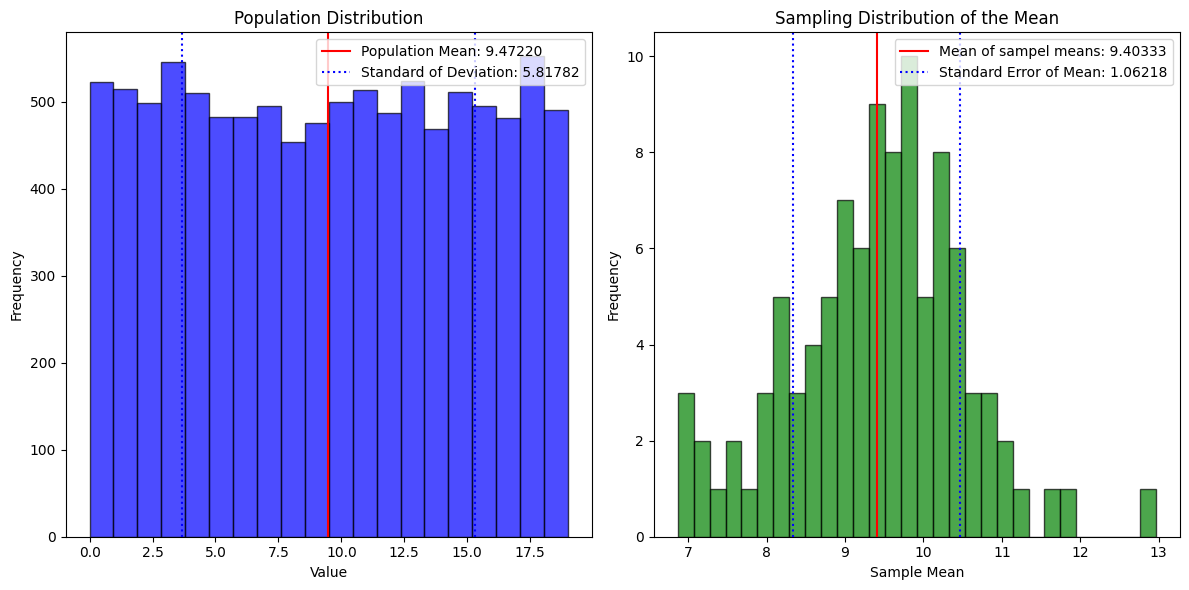

In [33]:
# Plotting the population and the sampling distribution of the mean
plt.figure(figsize=(12, 6))

# Plot the population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=len(unique_vals), alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=pm, color='r', linestyle='-', label=f'Population Mean: {pm:.5f}') # plot the mean

# Plot Standard of Deviation around the mean
plt.axvline(x=pm+population_std_dev, color='b', linestyle=':', label=f'Standard of Deviation: {population_std_dev:.5f}')
plt.axvline(x=pm-population_std_dev, color='b', linestyle=':')

plt.title('Population Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Plot the sampling distribution of the mean
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=sample_size, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=msm, color='r', linestyle='-', label=f'Mean of sampel means: {msm:.5f}') # plot the mean

# Plot Standard Error of the Mean around the mean of all samples means
plt.axvline(x=msm+sem, color='b', linestyle=':', label=f'Standard Error of Mean: {sem:.5f}')
plt.axvline(x=msm-sem, color='b', linestyle=':')

plt.title('Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Z-test

The z-test is used under these conditions (there is more as well!)
1. We have normal distributions
2. The populations std (standard of deviation) is known

In [34]:
# Defined functions for testing 

# Perform the Z-Test between population and a sample with population mean is given
def z_test(sample_mean, population_std, sample_size, population_mean):
    # Calculate Z-statistic
    z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    return z_stat

# perform the Z-test between two samples to test the significance for difference. 
def z_test_two_samples(sample1, sample2):
    mean1, std1, n1 = np.mean(sample1), np.std(sample1, ddof=1), len(sample1)
    mean2, std2, n2 = np.mean(sample2), np.std(sample2, ddof=1), len(sample2)
    
    pooled_std = np.sqrt(((std1**2 / n1) + (std2**2 / n2))) # Pooled standard deviation
    
    # Z-test statistic
    z_stat = (mean1 - mean2) / pooled_std
    return z_stat

#Calculate the p-value
def p_value_from_z(z):
    """Calculate the p-value for a given z-statistic using scipy (Scientific Python Library)."""
    # Calculate the CDF of the standard normal distribution
    cdf_value = stats.norm.cdf(z)
    # Calculate the two-tailed p-value
    return 2 * min(cdf_value, 1 - cdf_value)

# use standard z distribution to shade the area of the p-value
""" This is to plot the area of the p-value. This plot shows the probability that the sample is 
located in the noraml curve of the population """
def plot_p_value_area(z):
    x = np.linspace(-4, 4, 1000)  # Range for the x-axis
    y = stats.norm.pdf(x)  # PDF of the standard normal distribution
    
    plt.figure(figsize=(10, 6))
    
    # Plot the normal distribution
    plt.plot(x, y, label='Standard Normal Distribution')
    
    # Shade the area corresponding to the p-value
    plt.fill_between(x, 0, y, where=(x > abs(z)), color='red', alpha=0.5, label='Shaded Area')
    plt.fill_between(x, 0, y, where=(x < -abs(z)), color='red', alpha=0.5)
    
    plt.title('Normal Distribution with Shaded Area of P-Value')
    plt.xlabel('Z-Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

**Given that a normal curve for SAT score nationally has a mean of 500 and std of 100. If we have a sample from local population with mean of 533 and size of 100 people, let's test the hypothesis that nothing special is happening (null hypothesis) in the sample of local people.**

Given this scenario:

* Null Hypothesis (H₀): The local population SAT scores are from the same distribution as the national population, i.e., they have a mean of 500.
* Alternative Hypothesis (H₁): The local population SAT scores have a different mean than the national population.

In [35]:
# Given data
sample_mean = 533
sample_size = 100
populatoin_mean = 500
population_std = 100

z_stat = z_test(sample_mean, population_std, sample_size, populatoin_mean) # Calculate Z-statistic
p_value = p_value_from_z(np.abs(z_stat)) # Calculate p-value

# Print the results
print(f'Z-Statistic: {z_stat:.2f}')
print(f'P-Value: {p_value:.4f}')

Z-Statistic: 3.30
P-Value: 0.0010


A p-value of 0.0010 indicates strong evidence against the null hypothesis.
So, we can <font color="Blue">reject the null hypothesis and conclude that there is significant evidence that the local population's mean SAT score is different from the national mean</font>.

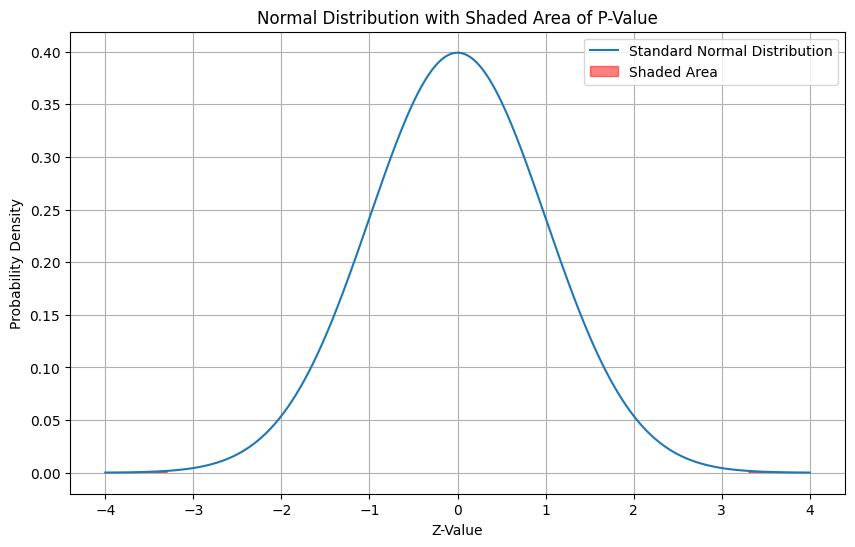

In [36]:
plot_p_value_area(z_stat)

**If we have two teaching methods that gave two different sets of scores. Use z-test to check whether the two methods differ from each other.** 

Given this scenario:
* Null Hypothesis: The mean scores of the two teaching methods are equal.
* Alternative Hypothesis: The mean scores of the two teaching methods are different 

In [37]:
# Generate sample data
np.random.seed(10)  # For reproducibility
# adjust the mean and std to control the relationship between both samples. 
method_A_scores = np.random.normal(loc=75, scale=5, size=100)  # Method A
method_B_scores = np.random.normal(loc=75, scale=5, size=100)  # Method B

# Create a DataFrame for convenience
data = pd.DataFrame({
    'Method A': method_A_scores,
    'Method B': method_B_scores
})

data

,Method A,Method B
0,81.657933,75.587378
1,78.576395,65.462716
2,67.272999,70.385454
3,74.958081,77.348757
4,78.106680,74.278166
...,...,...
95,79.591346,81.275869
96,72.589534,79.735630
97,75.447938,69.888447
98,79.134993,80.835842


In [38]:
# Calculate Z-statistic
z_stat2= z_test_two_samples(method_A_scores, method_B_scores)

# Calculate p-value manually
p_value = p_value_from_z(np.abs(z_stat2))

# Print the results
print(f'Z-Statistic: {z_stat2:.2f}')
print(f'P-Value: {p_value:.4f}')

Z-Statistic: 0.07
P-Value: 0.9413


A p-value of 0.9413 indicates strong evidence to support the null hypothesis.
So, we can <font color="Blue"> accept the null hypothesis and conclude that both teaching methods doesn't differ from each other</font>.

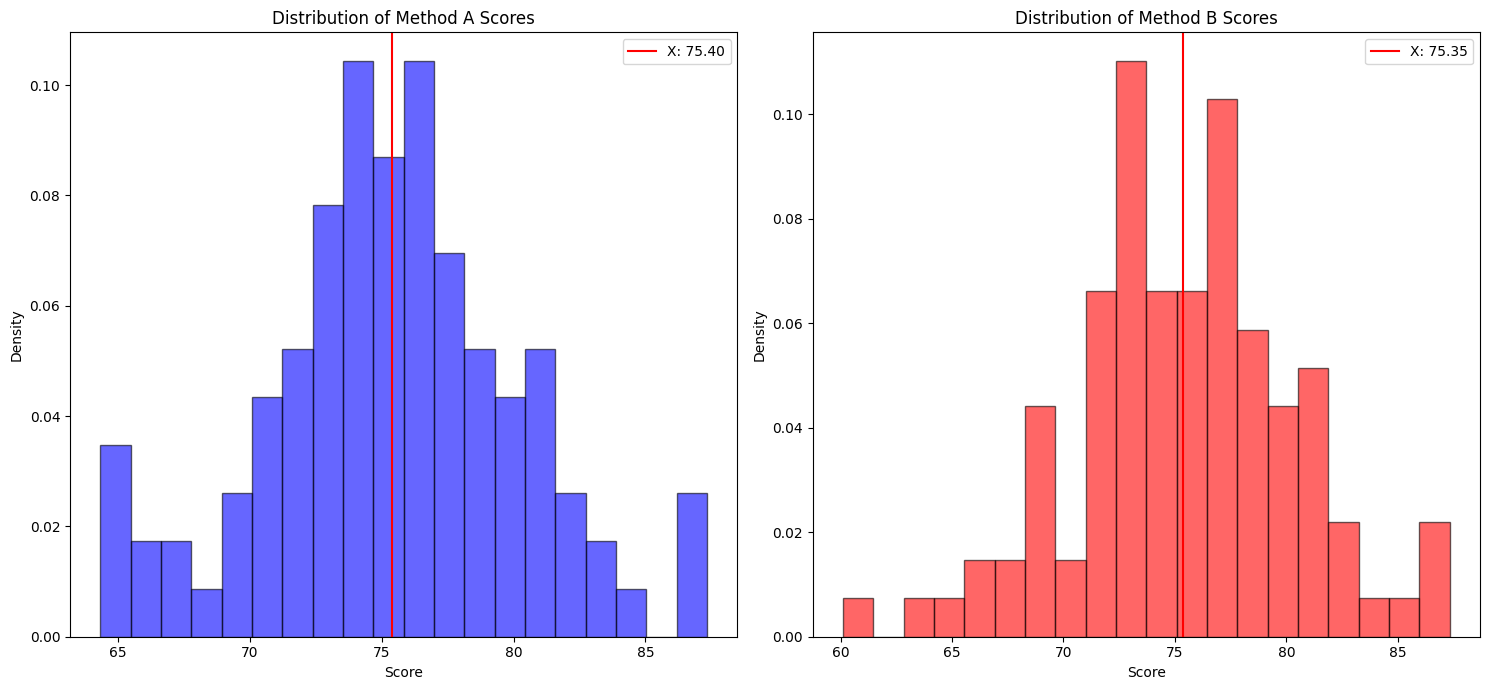

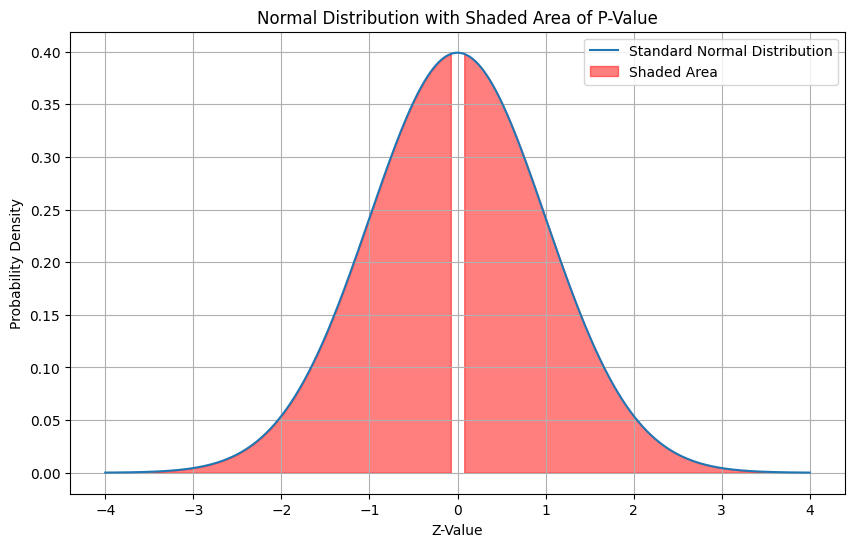

In [39]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Method A distribution
axs[0].hist(data['Method A'], bins=20, density=True, alpha=0.6, color='blue', edgecolor = 'black')
axs[0].axvline(x=np.mean(method_A_scores), color='r', linestyle='-', label=f'X: {np.mean(method_A_scores):.2f}')
axs[0].set_title('Distribution of Method A Scores')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Density')
axs[0].legend(loc='upper right')

# Method B distribution
axs[1].hist(data['Method B'], bins=20, density=True, alpha=0.6, color='red', edgecolor = 'black')
axs[1].axvline(x=np.mean(method_B_scores), color='r', linestyle='-', label=f'X: {np.mean(method_B_scores):.2f}')
axs[1].set_title('Distribution of Method B Scores')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Density')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

plot_p_value_area(z_stat2)

## Z-test based on two-tailed and one-tailed

In [40]:
# Defined functions for calculations

# Perform the Z-Test between population and a sample with population mean is given
def z_test(sample_mean, population_std, sample_size, population_mean):
    # Calculate Z-statistic
    z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    return z_stat

# Calculate the p-value
def p_value_from_z(z, one_tailed=False):
    """Calculate the p-value for a given z-statistic using scipy (Scientific Python Library)."""
    # Calculate the CDF of the standard normal distribution
    cdf_value = stats.norm.cdf(z)
    if not one_tailed:
        return 2 * min(cdf_value, 1 - cdf_value)  # Calculate the two-tailed p-value
    else:
        if z < 0:
            return cdf_value  # Lower tail p-value
        else:
            return 1 - cdf_value  # Upper tail p-value
        
# Plot the area of the p-value
def plot_p_value_area(z, one_tailed=False):
    x = np.linspace(-4, 4, 1000)  # Range for the x-axis
    y = stats.norm.pdf(x)  # PDF of the standard normal distribution
    
    plt.figure(figsize=(10, 6))
    
    # Plot the normal distribution
    plt.plot(x, y, label='Standard Normal Distribution')
    
    # Shade the area corresponding to the p-value
    if not one_tailed:
        plt.fill_between(x, 0, y, where=(x > abs(z)), color='red', alpha=0.5, label='Rejection Region (p-value)')
        plt.fill_between(x, 0, y, where=(x < -abs(z)), color='red', alpha=0.5)
    else:
        plt.fill_between(x, 0, y, where=(x > z), color='red', alpha=0.5, label='Rejection Region (p-value)')
        
    plt.title('Normal Distribution with Shaded Area of P-Value')
    plt.xlabel('Z-Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

We have two types of tests:
1. **One-Tailed Test**: this test uses one side of the normal distribution and involve comparision againest one z-score. 
2. **Two-Tailed Test**: this test uses both side of the normal distribution and involve equality between two z-scores.

To show this; assume we have a test that is performed. The average score for students is 100 with std of 5. We have a group who have taken the test. Check whether the group has common outcome. Then, the group has gone thourgh a special teaching method which is proven to increase the average to 120 and higher. Check weather the mean is 120 or larger.

We need to do two z-tests:
1. Two-Tailed test to check weather the group has common outcome. H0: Mean = 100.
2. One-Tailed test to check the performance after the teaching method. H0: Mean >= 120.

In [41]:
# Define parameters
sample_size = 1000
np.random.seed(10)  # For reproducibility
# adjust the mean and std to control the relationship between both samples. 
Test1_group = np.random.normal(loc=99.8, scale=5, size=sample_size)  # Before the teaching method; test 1
Test2_group = np.random.normal(loc=119.8, scale=5, size=sample_size)  # After the teaching method; test 2

T1G_mean = np.mean(Test1_group) # test group one mean
T1G_std = np.std(Test1_group, ddof=1) # test group one std
T2G_mean = np.mean(Test2_group) # test group two mean
T2G_std = np.std(Test2_group, ddof=1) # test group two std

population_mean1 = 100
population_mean2 = 120
population_std = 5

In [42]:
z_stat1 = z_test(T1G_mean, population_std, sample_size, population_mean1) # Calculate for test 1
p_value1 = p_value_from_z(np.abs(z_stat1)) # Calculate p-value
# Print the results
print(f'Z-Statistic for Test 1: {z_stat1:.2f}')
print(f'P-Value for Test 1: {p_value1:.4f}')
print()

z_stat2 = z_test(T2G_mean, population_std, sample_size, population_mean2)  # Calculate for test 2
p_value2 = p_value_from_z(np.abs(z_stat2), one_tailed=True)  # Calculate p-value
print(f'Z-Statistic for Test 2: {z_stat2:.2f}')
print(f'P-Value for Test 2: {p_value2:.4f}')

Z-Statistic for Test 1: -1.73
P-Value for Test 1: 0.0845

Z-Statistic for Test 2: -1.62
P-Value for Test 2: 0.0531


Using the standard level of significance (alpha) of 0.05 or 5%, we can obtain:
* A p-value for test 1 of 0.0845 shows support for the null hypothesis meaning that the group has common outcome and has no significant different from the population mean.
* A p-value for test 2 of 0.0531 which shows that there is strong evidence to reject the null hypothesis meaning that the teaching method doesn't affect the performance of students to get score of 120 or higher.

*Note that The level of significance (alpha) is also the probability of type 1 error.* 

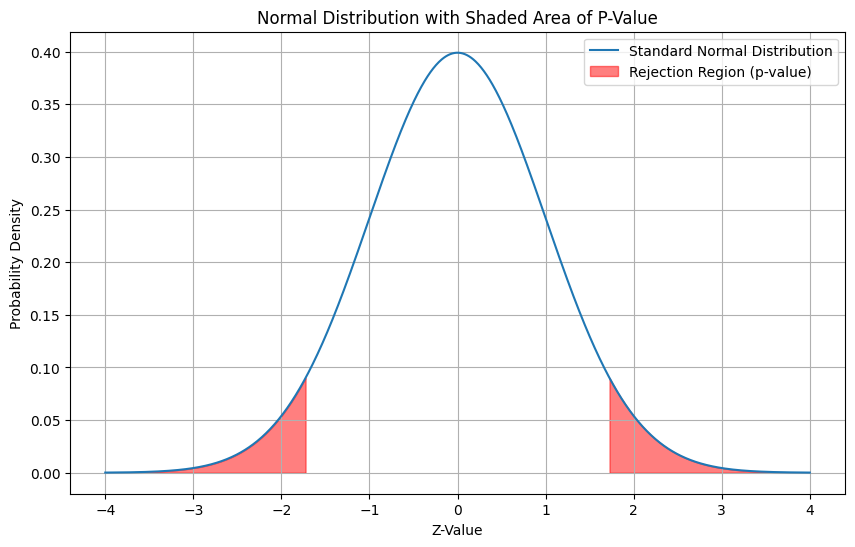

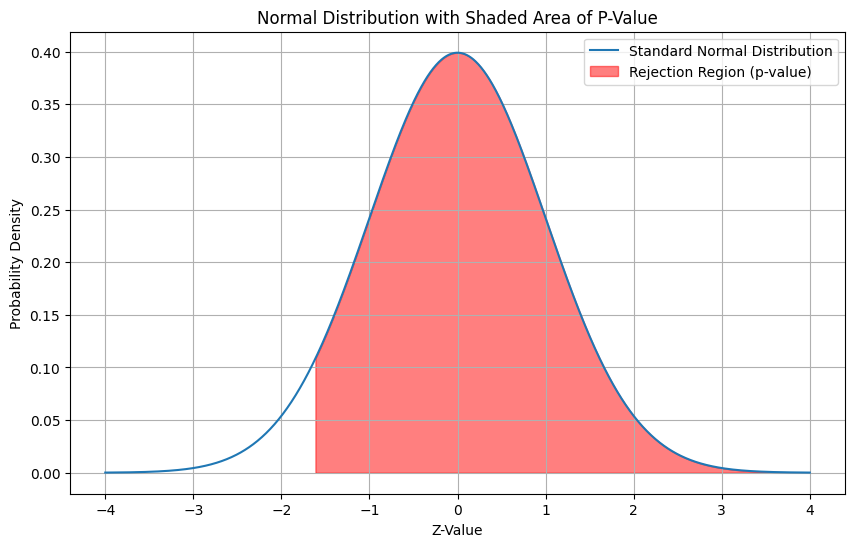

In [43]:
plot_p_value_area(z_stat1, one_tailed=False)
plot_p_value_area(z_stat2, one_tailed=True)

## Confidence Interval

In [44]:
# generate the population
Random_vals = np.random.randint(0, 20, size=100)
"""
# generate normal distibuted array
Random_vals = np.random.normal(10, 2, 1000) # normal array with parameters (mean, standard of deviation, size)
Random_vals = np.round(Random_vals) # Round the values to the nearest integers
Random_vals = np.clip(Random_vals, 1, 19) # Clip the values to be within the range 1 to 19

# Generate left-skewed or right-skewed values using Beta distribution
# if a_left < a_right, it is left-skewed. If the opposite, it is right-skewed. 
Random_vals = np.random.beta(5, 2, 1000) * 20 #parameters (a_left, b_left, size)
# Round and clip to integer values between 1 and 19
Random_vals = np.round(Random_vals)
Random_vals = np.clip(Random_vals, 1, 19)
"""
unique_vals, frequencies = np.unique(Random_vals, return_counts=True) # Calculate the frequency distibution

In [45]:
# Calculate sample mean and standard error
sample_mean = np.mean(Random_vals)
sample_std = np.std(Random_vals, ddof=1)
sample_size = len(Random_vals)
standard_error = sample_std / np.sqrt(sample_size)
print(f"Sample Mean: {sample_mean}")

# Calculate the CI using standard 1.96 value
margin_of_error = 1.96 * standard_error
CI = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval with standard error (critical value) 1.96:", CI)

# Calculate the CI using python scipy to get the standard error from confidence level of 95%
confidence_level = 0.95 # Assign Confidence level
alpha = 1 - confidence_level
critical_value = stats.t.ppf(1 - alpha/2, df=sample_size-1) # Calculate the critical value
margin_of_error = critical_value * standard_error # Calculate the margin of error
# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"Confidence Interval with standard error {critical_value:.5f}: {confidence_interval}")

Sample Mean: 9.74
Confidence Interval with standard error (critical value) 1.96: (8.55623185180253, 10.923768148197471)
Confidence Interval with standard error 1.98422: (8.541605700862519, 10.938394299137482)


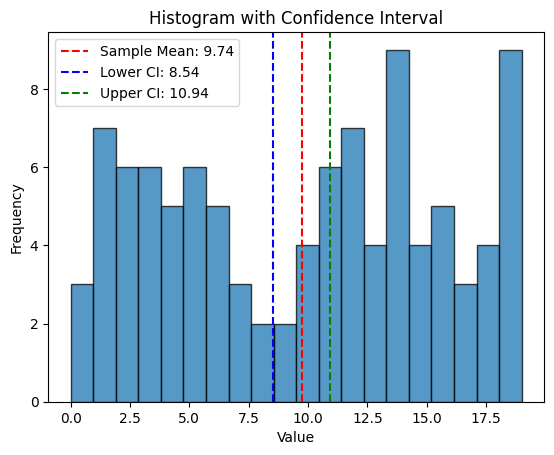

In [46]:
# Visualization
fig, ax = plt.subplots()
ax.hist(Random_vals, bins=len(unique_vals), edgecolor='k', alpha=0.75)

# Plot the sample mean
ax.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')

# Plot the confidence interval
ax.axvline(confidence_interval[0], color='blue', linestyle='--', label=f'Lower CI: {confidence_interval[0]:.2f}')
ax.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:.2f}')

ax.legend()
plt.title('Histogram with Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()